In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pygeohash as geo
import matplotlib.pyplot as plt

In [2]:
# laod data
df = pd.read_csv("data_user.csv")

In [3]:
# view first 5 samples
df.head()

,f1,user_id,item_id,behavior_type,user_geohash,item_category,time
0,0,10001082,285259775,1,97lk14c,4076,2020/12/8
1,1,10001082,4368907,1,NaN,5503,2020/12/12
2,2,10001082,53616768,4,NaN,9762,2020/12/2
3,3,10001082,9947871,1,NaN,2825,2020/11/28
4,4,10001082,150720867,1,95qoghe,3200,2020/12/15


In [4]:
# shape of the dataset
df.shape

(1000805, 7)

In [5]:
# drop samples with at least one null value
df_drop_null = df.dropna()

In [6]:
# drop duplicate sampels
df_drop_duplicates = df_drop_null.drop_duplicates()

In [7]:
# shape of dataset after cleaning 
df_cleaned = df_drop_duplicates
df_cleaned.shape

(454204, 7)

In [8]:
# covert time format
df_cleaned.loc[:, "time"] = pd.to_datetime(df_cleaned.loc[:,"time"])

In [9]:
# dehashing user_geohash

# def de_hashing_geo(x): 
#       return geo.decode(x)
    
# dehash = np.vectorize(de_hashing_geo) 
# df_cleaned.loc[:, "user_geohash"] = dehash(df_cleaned.user_geohash.values)

# def geo_decode(x):
#     lat, lon = geo.decode(x)
#     return pd.Series({"latitude":lat, "longitude":lon})

# df = df_cleaned.join(df_cleaned["user_geohash"].apply(geo_decode))

In [10]:
# view datset after cleaned
df_cleaned.head(10)

,f1,user_id,item_id,behavior_type,user_geohash,item_category,time
0,0,10001082,285259775,1,97lk14c,4076,2020-12-08
4,4,10001082,150720867,1,95qoghe,3200,2020-12-15
6,6,10001082,266563343,1,95qobus,5232,2020-12-12
8,8,10001082,22667958,1,95qogn4,10523,2020-12-15
10,10,10001082,133020432,1,95qog2a,3200,2020-12-15
14,14,10001082,582649,1,95qobbk,12147,2020-12-17
15,15,10001082,117708332,1,97lk157,5176,2020-12-08
17,17,10001082,29558680,1,95qob0m,5232,2020-12-12
19,19,10001082,362845104,1,97lk15v,5176,2020-12-08
20,20,10001082,222375145,1,95qobv6,5503,2020-12-12


In [11]:
# daily page view counts
time = df_cleaned['time'].value_counts().index
page_view_counts = df_cleaned['time'].value_counts().values
daily_view_counts = pd.DataFrame({'Time': time, 'Page_View_Counts': page_view_counts})

In [12]:
daily_view_counts

,Time,Page_View_Counts
0,2020-12-12,30823
1,2020-12-11,24269
2,2020-12-10,23316
3,2020-12-14,21271
4,2020-12-13,19729
5,2020-12-08,19432
6,2020-12-15,18832
7,2020-12-17,18431
8,2020-12-16,17492
9,2020-12-09,17479


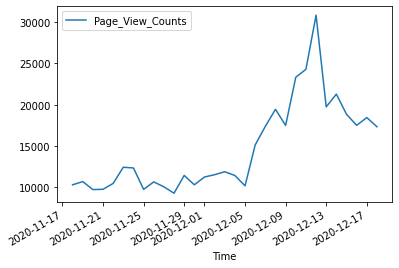

In [13]:
# visualize the daily view counts
daily_view_counts.plot(x = 'Time' , y='Page_View_Counts', kind = 'line')
plt.show()

In [14]:
# average daily view counts 
average_daily_views = daily_view_counts['Page_View_Counts'].mean()
print(int(average_daily_views))

14651


In [15]:
# calculating daily unique visitor
unique_dates = df_cleaned['time'].unique()
uv_counts = []

for day in unique_dates:
    df_day = df_cleaned[df_cleaned['time'] == day]
    unique_visitors = len(df_day['user_id'].unique())
    uv_counts.append(unique_visitors)

df_uv_counts = pd.DataFrame({'Time': unique_dates, 'Unique_Visitor_Counts': uv_counts})

In [16]:
df_uv_counts

,Time,Unique_Visitor_Counts
0,2020-12-08,424
1,2020-12-15,441
2,2020-12-12,539
3,2020-12-17,395
4,2020-11-24,289
5,2020-12-07,379
6,2020-12-18,403
7,2020-12-11,460
8,2020-11-25,260
9,2020-12-05,253


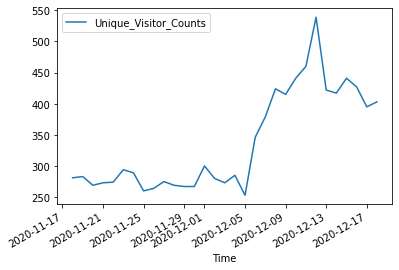

In [17]:
# visualize the daily view counts
df_uv_counts.plot(x = 'Time' , y='Unique_Visitor_Counts', kind = 'line')
plt.show()

In [18]:
# average daily unique visitors view counts 
average_uv_views = df_uv_counts['Unique_Visitor_Counts'].mean()
print(int(average_uv_views))

337


In [19]:
# calcuating purchase rate
total_actions = df_cleaned['behavior_type'].count()
buying_actions_count = len(df_cleaned[df_cleaned['behavior_type'] == 4].index)
print("Total actions count: ", total_actions)
print("Purchase actions count:", buying_actions_count)
print("Purchasing rate: ", int((buying_actions_count/total_actions)*100), "%")

Total actions count:  454204
Purchase actions count: 4583
Purchasing rate:  1 %


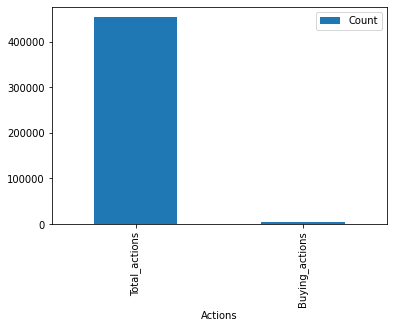

In [20]:
# visualize purchasing rate
purchase_rate = pd.DataFrame({'Actions': ['Total_actions', 'Buying_actions'], 'Count':[total_actions, buying_actions_count]})
purchase_rate.plot(x = 'Actions', y = 'Count', kind='bar')
plt.show()

In [21]:
# calcuating re-purchase rate
buying_actions = df_cleaned[df_cleaned['behavior_type'] == 4]
buying_counts = buying_actions['user_id'].value_counts().to_frame()
repurchase = buying_counts.apply(lambda x : True if x['user_id'] > 1 else False, axis = 1)
repurchase_counts = len(repurchase[repurchase == True].index)

print("Total purchasing counts: ", buying_actions_count)
print("Repurchasing counts: ", repurchase_counts)
print("Repurchasing rate: ", int((repurchase_counts/buying_actions_count)*100), "%")

Total purchasing counts:  4583
Repurchasing counts:  554
Repurchasing rate:  12 %


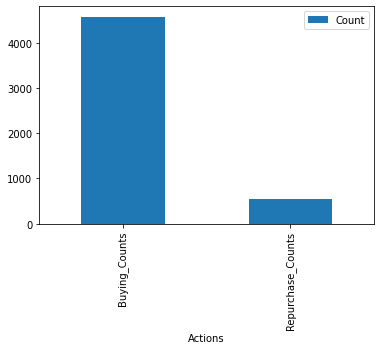

In [22]:
repurchase_rate = pd.DataFrame({'Actions': ['Buying_Counts', 'Repurchase_Counts'], 'Count':[buying_actions_count, repurchase_counts]})
repurchase_rate.plot(x = 'Actions', y = 'Count', kind='bar')
plt.show()

In [23]:
# funnel analysis
click_count = len(df_cleaned[df_cleaned['behavior_type'] == 1].index)
collect_count = len(df_cleaned[df_cleaned['behavior_type'] == 2].index)
add_to_cart_count = len(df_cleaned[df_cleaned['behavior_type'] == 3].index)
purchase_count = len(df_cleaned[df_cleaned['behavior_type'] == 4].index)

# conversion rate
conversion1_2 = (collect_count/click_count)*100
conversion2_3 = (add_to_cart_count/collect_count)*100
conversion3_4 = (purchase_count/add_to_cart_count)*100

print("Conversion rate from click into an item to collect an item: ", int(conversion1_2), "%")
print("Conversion rate from collecting an item to adding the item to cart: ", int(conversion2_3), "%")
print("Conversion rate from adding an item to cart to purchasing an item: ", int(conversion3_4), "%")

print("\n")

# churn rate = 1 - conversion rate
churn1_4 = (1-(purchase_count/click_count))*100
print("Churn rate from clicking into an item to purchasing an item: ", int(churn1_4), "%")

Conversion rate from click into an item to collect an item:  2 %
Conversion rate from collecting an item to adding the item to cart:  128 %
Conversion rate from adding an item to cart to purchasing an item:  37 %


Churn rate from clicking into an item to purchasing an item:  98 %


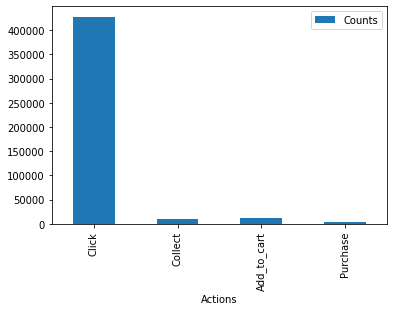

In [24]:
funnel_analysis = pd.DataFrame({'Actions':['Click', 'Collect', 'Add_to_cart', 'Purchase'], 'Counts': [click_count, collect_count, add_to_cart_count, purchase_count]})
funnel_analysis.plot(x = 'Actions', y = 'Counts', kind='bar')
plt.show()

In [25]:
# user value analysis
df_buying = df_cleaned[df_cleaned['behavior_type'] == 4]
# rfm analysis
now = dt.datetime(2022,4,19)
rfm_model = df_buying.groupby("user_id").agg({"item_id": lambda num: len(num),
                                             "time": lambda date: (now - date.max()).days})
# change the names of rfm model
rfm_model.columns = ["Frequency", "Recency"]

In [26]:
rfm_model

,Frequency,Recency
user_id,,
100890,2,488
1042942,1,490
1050718,1,488
1087279,1,489
1111549,12,487
...,...,...
117287942,1,501
117291728,4,487
117297257,7,487
